

# Analyzing Movie Data: Exploring Trends in the Film Industry
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<p>
 In this data report, I will explore patterns and insights in the movie industry using data from the 'TMDB' website, which contains a list of over 10,000 movies produced between 1960 and 2015. I will focus more on the success factors of the top companies in this industry.To be more specific and precise, I have cleaned the data and added visualizations to identify clear correlations and find answers about these questions below :
</p>

- **What are the top movie budgets in 2015 ?**
- **What are the most popular genres for Millennials ?**

In [1]:
# importing packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

This section is for fetching data, know more about it and check its cleanliness. The three main steps are:
- Gathering Data
- Assessing
- Cleaning


#### Gathering & Assessing Data

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# find each column data type and missing values
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Until here there isn't any 'important' `NaN` values will affect answering our questions or uncorrect datatype.

In [4]:
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The `describe()` method shows that there are missing values represented as zeros instead of `NaN` in certain columns, such as `budget` and `revenue`. Therefore, defining a function is necessary to count the zeros in a specific part of the data.

In [5]:
# define a function to count the number of missing values which represented with zero in a column
def count_zero_values(column_name):
    '''
    This function takes a column name and return the number of zero values in this column

    Arguments:
    column_name : string, the name of the column that we want to count the number of zero values in it
    '''
    return movies_data[movies_data[column_name] == 0].value_counts().sum()

Then, I applied the fuction on needed intger columns to check zeros.

In [6]:
# count the number of zero values in the budget column
count_zero_values('budget')

np.int64(546)

In [7]:
# count the number of zero values in the revenue column
count_zero_values('revenue')

np.int64(546)

In [8]:
# count the number of zero values in the runtime column
count_zero_values('runtime')

np.int64(2)

> Actually "zero runtime movies" rows won't affect seriously answering the questions.

In [9]:
# count the number of zero values in the popularity column
count_zero_values('popularity')

np.int64(0)

In [10]:
# check duplicates in the data
movies_data.duplicated().sum()

np.int64(1)


At the end of this section, errors should be cleaned are :
- movies with zero revenue 
- movies with zero budget
- selecting only needed columns
- duplicated rows

#### Data Cleaning "capturing the useful data only"

In [11]:
# getting a copy of the data to apply cleaning on it
movies_cleaned = movies_data.copy()

The code cell above makes a copy of the original dataset to modify it freely.

In [12]:
# taking non-zero values in the revenue and budget columns
movies_cleaned = movies_cleaned[movies_cleaned['revenue'] != 0]
movies_cleaned = movies_cleaned[movies_cleaned['budget'] != 0]

Selecting rows which contain real values for budget and revenue and assign it in the copied dataset variable.

In [13]:
# dropping columns that are not needed the most
movies_cleaned.drop(['id', 'imdb_id', 'homepage', 'tagline', 'revenue_adj', 'budget_adj'], axis=1, inplace=True)
movies_cleaned.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

The code above cleans unnecessary data columns to create an efficient dataset for exploration.

In [14]:
# dropping duplicates and applying the changes on the copied data
movies_cleaned.drop_duplicates(inplace=True)

Now, the data is cleaned as needed, considering the zero values in budget and revenue, additional unnecessary data, and duplicates.
I will explore correlations, patterns and know more about movies using `movies_cleand` dataset in the next section.

<a id='eda'></a>
## Exploratory Data Analysis

<p>In this section, I will explore the data to uncover insights and identify patterns related to the research questions. Visualizations will be used to highlight correlations and trends clearly.</p>

#### **Q1: What are the top movie budgets in 2015?**


Given the large number of movies produced in 2015, I chose to focus on comparing budgets rather than visualizing each movie individually. This approach highlights budget distribution more effectively.

In [15]:
# selecting budget in 2015 and converting it to million dollars for better visualization
m_budgets = np.array(movies_cleaned[movies_cleaned['release_year'] == 2015]['budget']) / 1e6

# modify the x-axis ticks to be in million dollars format
budget_ticker = np.arange(0, m_budgets.max() + 50, 50)
budget_labels = [f'{int(tick)}M' for tick in budget_ticker]

That cell is important for understanding the visualization easily by converting large numbers into a shorter format, adding the letter 'M' beside the numbers to indicate millions.

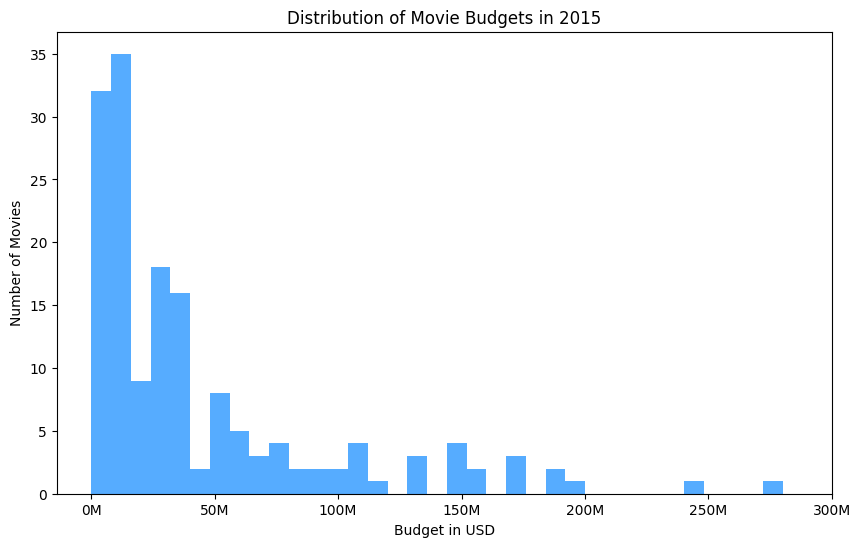

In [16]:
# making a plot for the budget distribution in 2015

# set the figure size
plt.figure(figsize=(10, 6))  

# make a histogram for the budget distribution
sns.histplot(data=m_budgets, color='dodgerblue', bins=35, edgecolor='none')

# modifying the x-axis ticks using the prepared arguments from the previous cell 
plt.xticks(budget_ticker, budget_labels)

# set the title and labels of the plot
plt.title('Distribution of Movie Budgets in 2015')
plt.xlabel('Budget in USD', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)

# plot the budget distribution
plt.show()

The visualization shows that most movie budgets in 2015 were concentrated below $100 million. This distribution might reflect the impact of global financial conditions during that period.<br>
When it comes to financial data, a right-skewed distribution is common, as higher budgets are less frequent and typically represent a small number of movies.

In [17]:
# checking very high budget movies in 2015
pop_corr = movies_cleaned[(movies_cleaned['release_year'] == 2015) & (movies_cleaned['budget']> 200000000)]
# print the data of production companies, popularity, original title 
 # and cast of the high budget movies
pop_corr[['original_title', 'popularity', 'production_companies', 'cast']]

,original_title,popularity,production_companies,cast
10,Spectre,6.200282,Columbia Pictures|Danjaq|B24,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...
14,Avengers: Age of Ultron,5.944927,Marvel Studios|Prime Focus|Revolution Sun Studios,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...


In [18]:
# checking the mean and median of the popularity column for all movies
print('The median of popularity is:',movies_cleaned['popularity'].median())
print('The mean of popularity is:',movies_cleaned['popularity'].mean())

The median of popularity is: 0.7975105
The mean of popularity is: 1.1915540918526204


Big production companies like Columbia Pictures and Marvel Studios, along with famous cast members, may have influenced the popularity and budgets of these high-budget movies. Their popularity is significantly higher than the median and mean popularity of all movies. Therefore, we can suggest that there is a correlation between popularity and high budgets.

#### **Q2: What are the most popular genres for Millennials ?**

Many people born in the nineties believe they witnessed a golden era of cinematic production, but what about movie genres?
This analysis aims to explore the main genres of movies, focusing on their trends during the 1990s.

First, I will select the year range from 1990 to 2000. Then, I will create a modified DataFrame containing only the genres and years to prepare for an appropriate visualization.

In [19]:
# get the data in the range of 1990 to 2000
year_slct = movies_cleaned[(movies_cleaned['release_year'] <= 2000) & (movies_cleaned['release_year'] >= 1990)]


In [20]:
# making a list containing the main genres
genres_list = ['Action', 'Comedy', 'Science Fiction', 'Horror', 'Adventure', 'Romance']

In [21]:
# empty dictionary to store the genres and their counts
genres_dict = {}
# loop over the genres list to get the count of each genre in each year
for genre in genres_list:
   genres_count = year_slct[year_slct['genres'].str.contains(genre, case=False, na=False)]
   year_counts = genres_count['release_year'].value_counts().sort_index().to_dict()
   genres_dict[genre] = year_counts
   

Until now, the `genres_dict` contains the required data. However, to create a visualization, a DataFrame is needed. Therefore, I am converting it into a "long-format DataFrame".

In [22]:
# converting the dictionary to a dataframe
genres_df = pd.DataFrame(genres_dict)
# making the year as a column instead of an index
genres_df = genres_df.reset_index(names='Year')
genres_df.head()

,Year,Action,Comedy,Science Fiction,Horror,Adventure,Romance
0,1990,19,18,11,13,11,7
1,1991,21,22,6,2,12,7
2,1992,17,17,6,8,9,8
3,1993,21,23,6,9,14,14
4,1994,21,27,10,5,10,12


To plot the DataFrame I should convert it to the long form of the DataFrame.

In [23]:
# melt the dataframe to have the genres as a column to be able to plot it
genres_long = genres_df.melt(id_vars='Year', var_name='Genre', value_name='Count')
genres_long.head()

,Year,Genre,Count
0,1990,Action,19
1,1991,Action,21
2,1992,Action,17
3,1993,Action,21
4,1994,Action,21


The "Grouped Bar Chart" is a suitable choice here to show the distribution of genres across the millennial period.

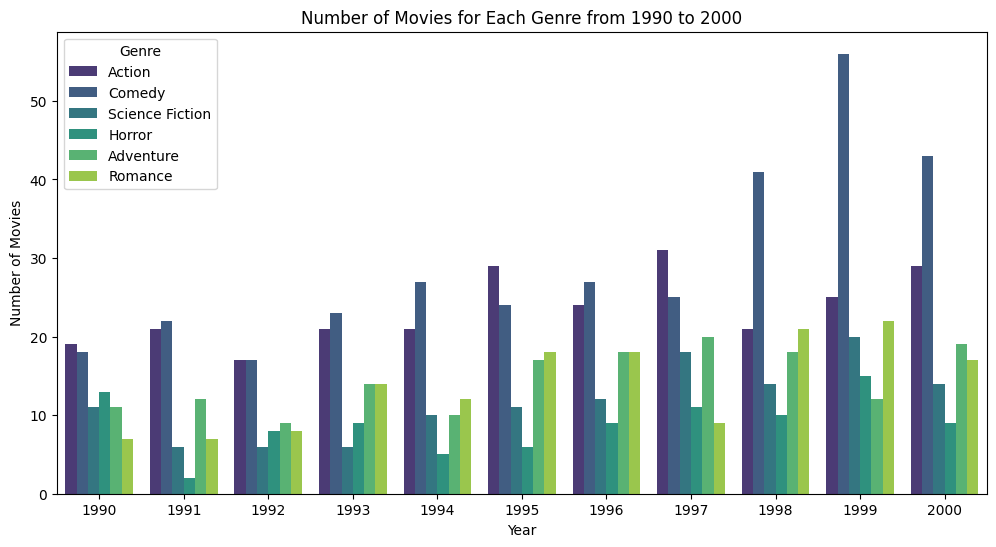

In [24]:
# plotting the number of movies for each genre in the selected years
# setting the figure size
plt.figure(figsize=(12, 6))
# making a bar plot for the genres
sns.barplot(data=genres_long, x='Year', y='Count', hue='Genre', palette='viridis')
# adding the title and labels to the plot
plt.title('Number of Movies for Each Genre from 1990 to 2000')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
# showing the plot
plt.show()


> Notice that every movie may appear multiple times under different genres.

As shown, millennials seemed to prefer Action and Comedy movies. On the other hand, Horror movies didn't gain much popularity during that period. Movie makers didn't pay significant attention to the Science Fiction genre, which could be due to its typically high production costs.
<br>

Assuming that filmmakers produce movies based on genres that resonate with audiences, we can identify the most popular genres throughout the 1990s.  
To quantify this, we will use the **Standard Deviation (std)**, which measures the **variability of production** for each genre over the decade.  
- A **low standard deviation** indicates consistent production levels, suggesting steady audience interest.  
- A **high standard deviation** may reflect fluctuations in production, potentially signaling shifting audience preferences or trends.  

In [25]:
# getting the standard deviation for each genre
genres_df.drop(columns='Year').std()

Action              4.546727
Comedy             12.110101
Science Fiction     4.696227
Horror              3.628173
Adventure           3.958880
Romance             5.629468
dtype: float64

The **Comedy** genre shows a significantly high standard deviation compared to other genres, driven by the production of more than 40 movies each year between **1998 and 2000**, as shown in the grouped bar chart. This spike in output greatly influenced its variability.  
On the other hand, **Horror** and **Adventure** genres exhibit a more stable production rate, reflected in their lower standard deviations. This could suggest that these genres maintained relatively consistent popularity throughout the decade.  

<a id='conclusions'></a>
## Conclusions

At the end of this report, I have explored the different correlations of questions I chose to explain which are:
- **What are the top movie budgets in 2015 ?**
- **What are the most popular genres for Millennials ?**<br>

**Insights:** <br>

- I found a right-skewed distribution of movie budgets in 2015, with a few movies having budgets greater than $200M. Variables such as production company, cast, and popularity could have influenced movie budgets in 2015.
- Most Millennials may prefer watching Action or Comedy movies rather than Horror movies. Several factors could have influenced movie makers in the 1990s to focus more on Action and Comedy genres.

**Limitations:** <br>

- The concentration of movie budgets in 2015 under $100M does not imply that any movie within this budget range is popular or not.
- The large number of Action and Comedy movies produced in the 1990s does not mean that all Millennials like these genres.